In [7]:
#import netCDF4 as nc
import pandas as pd
#import pandasql as ps
#import xarray as xr
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

In [3]:
#import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon
import numpy as np
import glob
#import xarray as xr

In [4]:
import geopandas as gpd


In [5]:
shapeWorld = gpd.read_file('/Users/paolo/Documents/Prec_TSO/data/shapefiles/world_shapefile/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')

# 1) sst_trop_raw.csv

In [4]:
path='/Users/paolo/Documents/clint_datasets/sst_trop_raw.csv'
sst_trop_raw = pd.read_csv(path)
sst_trop_raw

,Unnamed: 0,nino3,nino4,nino34,nino12,indocW,indocE
0,1980-01-01,23.942200,28.309878,26.591961,24.035522,28.033656,28.616884
1,1980-01-02,23.971452,28.305696,26.569124,23.992092,28.073231,28.636822
2,1980-01-03,24.042123,28.349518,26.608834,23.880026,28.085753,28.646284
3,1980-01-04,24.116480,28.406776,26.680904,23.739717,28.051649,28.627038
4,1980-01-05,24.173157,28.460211,26.768365,23.639157,27.977537,28.587550
...,...,...,...,...,...,...,...
362,1980-12-28,23.805540,27.881184,25.995028,22.775175,27.840842,28.599077
363,1980-12-29,23.736847,27.841060,25.908319,22.716317,27.773790,28.572666
364,1980-12-30,23.676883,27.782499,25.745995,22.715007,27.711903,28.568908
365,1980-12-31,23.675894,27.725400,25.588018,22.801490,27.680958,28.584781


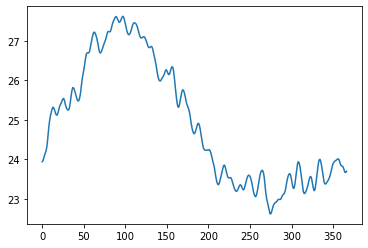

In [5]:
plt.plot(sst_trop_raw.nino3)

Una riga per ciascun giorno del 1980, sst in 6 regioni differenti, dati giornalieri.

# 2) sst_trop.grb

6.990 dati al giorno per varie combinazioni latitudine-longitudine (10.512 diverse).
Ho plottato tutte le celle il primo gennaio e tutti i giorni all'equatore.

In [6]:
ds = xr.open_dataset("/Users/paolo/Desktop/tc_data/2d_sst_trop_19800101_19801231.grb")
sst_trop_bidim = ds.to_dataframe()
sst_trop_bidim

number   step  surface valid_time         sst
time       latitude longitude                                               
1980-01-01  90.0    -180.0          0 0 days      0.0 1980-01-01  271.459717
                    -177.5          0 0 days      0.0 1980-01-01  271.459717
                    -175.0          0 0 days      0.0 1980-01-01  271.459717
                    -172.5          0 0 days      0.0 1980-01-01  271.459717
                    -170.0          0 0 days      0.0 1980-01-01  271.459717
...                               ...    ...      ...        ...         ...
1980-12-31 -90.0     167.5          0 0 days      0.0 1980-12-31         NaN
                     170.0          0 0 days      0.0 1980-12-31         NaN
                     172.5          0 0 days      0.0 1980-12-31         NaN
                     175.0          0 0 days      0.0 1980-12-31         NaN
                     177.5          0 0 days      0.0 1980-12-31         NaN

[3847392 rows x 5 columns]

In [4]:
print(sst_trop_bidim.step.unique())
print(sst_trop_bidim.surface.unique())
print(sst_trop_bidim.surface.unique())

[0]
[0.]
[0.]


In [7]:
sst_trop_bidim = sst_trop_bidim.reset_index()
sst_trop_bidim = sst_trop_bidim.loc[:,['time','latitude','longitude','sst']]
sst_trop_bidim.groupby(['time']).count()

,latitude,longitude,sst
time,,,
1980-01-01,10512,10512,6990
1980-01-02,10512,10512,6990
1980-01-03,10512,10512,6990
1980-01-04,10512,10512,6990
1980-01-05,10512,10512,6990
...,...,...,...
1980-12-27,10512,10512,6990
1980-12-28,10512,10512,6990
1980-12-29,10512,10512,6990


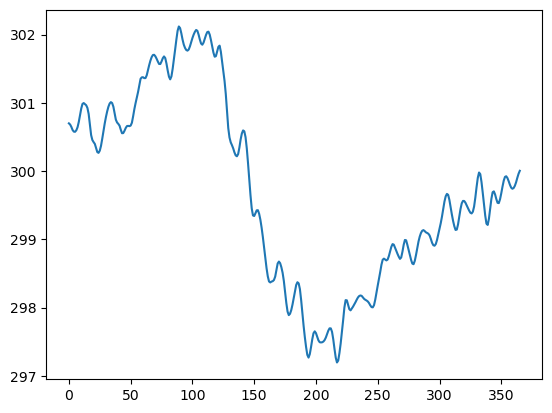

In [8]:
plt.plot(sst_trop_bidim.loc[(sst_trop_bidim.latitude==0) & (sst_trop_bidim.longitude==0),'sst'].reset_index(drop=True))

In [9]:
sst_trop_bidim = sst_trop_bidim.loc[sst_trop_bidim.time=='1980-01-01'].dropna()
sst_trop_bidim.to_csv('sst_trop_bidim1.csv',index=False)

<AxesSubplot: >

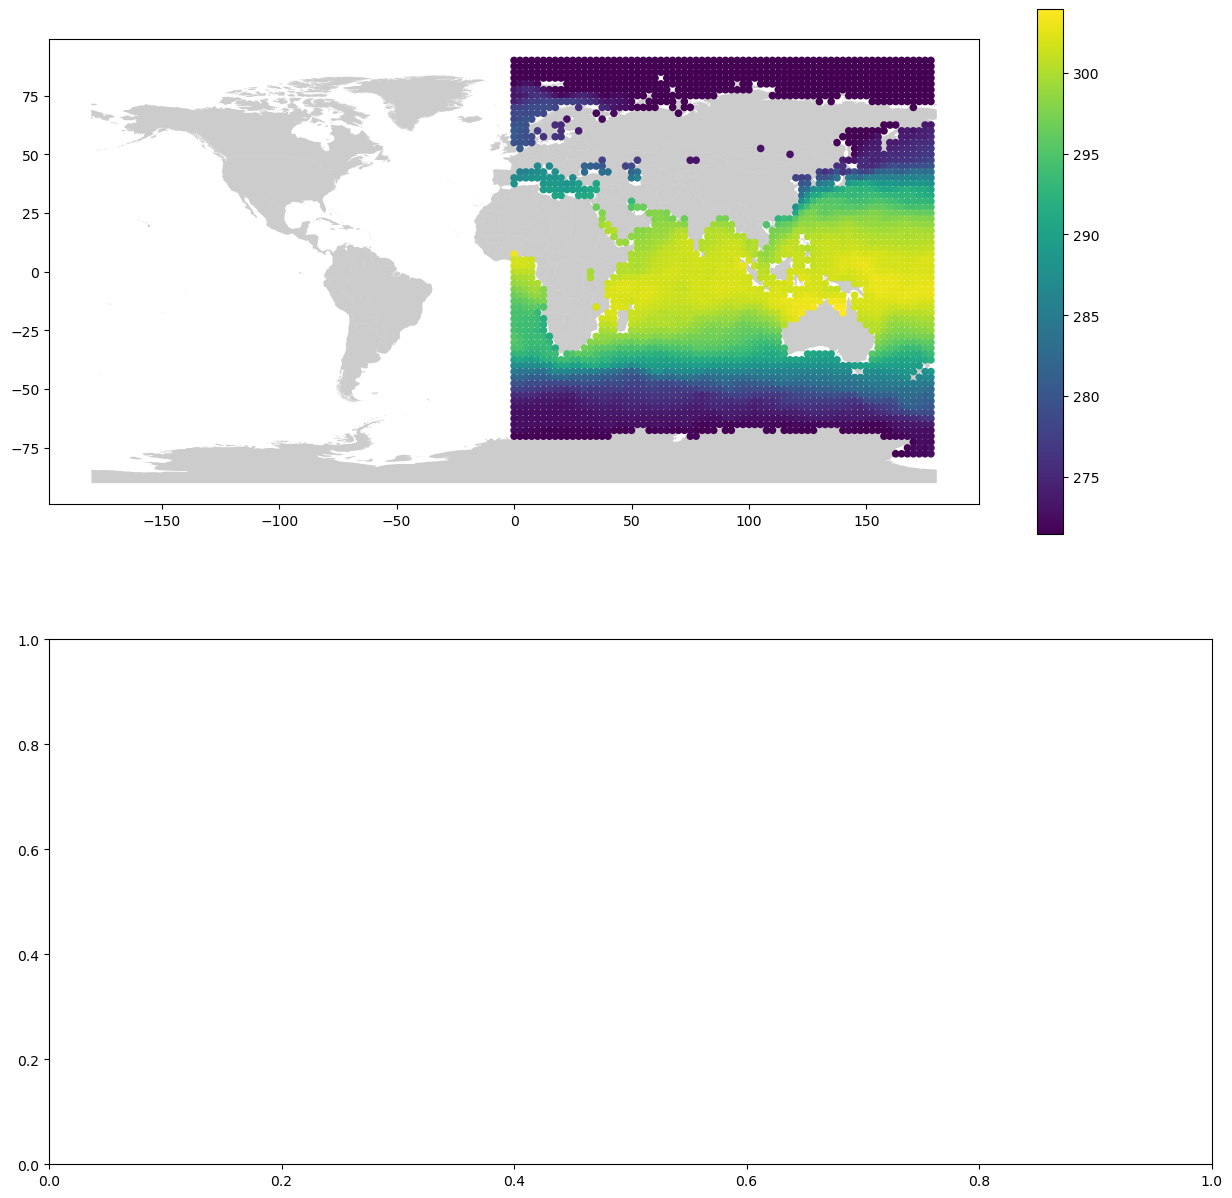

In [9]:
sst_trop_bidim = pd.read_csv('sst_trop_bidim1.csv')
crs = {'init' : 'EPSG:4326'}
sst_trop_bidim = sst_trop_bidim.loc[sst_trop_bidim.longitude>=0]

geometry_mi = [Point(xy) for xy in zip(sst_trop_bidim['longitude'], sst_trop_bidim['latitude'])]
geometry_mi[:3]

features_gdf = gpd.GeoDataFrame(sst_trop_bidim,geometry=geometry_mi) # ,crs=crs

fig,ax = plt.subplots(2,1,figsize=(15,15))

shapeWorld.plot(ax=ax[0],alpha=0.4,color='grey')
features_gdf.plot(ax=ax[0],markersize=20,marker='o',label='sst',column='sst',legend=True)
 

In [5]:
### check altri file
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_sst_trop_19800331_19800628.grb")
sst_trop_bidim = ds.to_dataframe()

sst_trop_bidim = sst_trop_bidim.reset_index()
sst_trop_bidim = sst_trop_bidim.loc[:,['time','latitude','longitude','sst']]
sst_trop_bidim.groupby(['time']).count()

,latitude,longitude,sst
time,,,
1980-03-31,10512,10512,6990
1980-04-01,10512,10512,6990
1980-04-02,10512,10512,6990
1980-04-03,10512,10512,6990
1980-04-04,10512,10512,6990
1980-04-05,10512,10512,6990
1980-04-06,10512,10512,6990
1980-04-07,10512,10512,6990
1980-04-08,10512,10512,6990


In [6]:
### check altri file
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_sst_trop_19800629_19800926.grb")
sst_trop_bidim = ds.to_dataframe()

sst_trop_bidim = sst_trop_bidim.reset_index()
sst_trop_bidim = sst_trop_bidim.loc[:,['time','latitude','longitude','sst']]
sst_trop_bidim.groupby(['time']).count()

,latitude,longitude,sst
time,,,
1980-06-29,10512,10512,6990
1980-06-30,10512,10512,6990
1980-07-01,10512,10512,6990
1980-07-02,10512,10512,6990
1980-07-03,10512,10512,6990
1980-07-04,10512,10512,6990
1980-07-05,10512,10512,6990
1980-07-06,10512,10512,6990
1980-07-07,10512,10512,6990


In [8]:
### check altri file
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_sst_trop_19800927_19801225.grb")
sst_trop_bidim = ds.to_dataframe()

sst_trop_bidim = sst_trop_bidim.reset_index()
sst_trop_bidim = sst_trop_bidim.loc[:,['time','latitude','longitude','sst']]
sst_trop_bidim.groupby(['time']).count()

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_sst_trop_19800927_19801225.grb.923a8.idx' incompatible with GRIB file


,latitude,longitude,sst
time,,,
1980-09-27,10512,10512,6990
1980-09-28,10512,10512,6990
1980-09-29,10512,10512,6990
1980-09-30,10512,10512,6990
1980-10-01,10512,10512,6990
1980-10-02,10512,10512,6990
1980-10-03,10512,10512,6990
1980-10-04,10512,10512,6990
1980-10-05,10512,10512,6990


In [9]:
### check altri file
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_sst_trop_19801226_19810101.grb")
sst_trop_bidim = ds.to_dataframe()

sst_trop_bidim = sst_trop_bidim.reset_index()
sst_trop_bidim = sst_trop_bidim.loc[:,['time','latitude','longitude','sst']]
sst_trop_bidim.groupby(['time']).count()

,latitude,longitude,sst
time,,,
1980-12-26,10512,10512,6990
1980-12-27,10512,10512,6990
1980-12-28,10512,10512,6990
1980-12-29,10512,10512,6990
1980-12-30,10512,10512,6990
1980-12-31,10512,10512,6990
1981-01-01,10512,10512,6990


# 2) gpi.grb

10.512 dati al giorno per varie combinazioni latitudine-longitudine (10.512 diverse).
Ho plottato tutte le celle il primo gennaio e tutti i giorni all'equatore. isobaricInhPa è sempre uguale a 850!

In [5]:
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'vo'}})
#ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb")
gpi_bidim = ds.to_dataframe()
gpi_bidim

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb.02ccc.idx' incompatible with GRIB file


number   step  isobaricInhPa valid_time  \
time       latitude longitude                                            
1980-01-01  90.0    -180.0          0 0 days          850.0 1980-01-01   
                    -177.5          0 0 days          850.0 1980-01-01   
                    -175.0          0 0 days          850.0 1980-01-01   
                    -172.5          0 0 days          850.0 1980-01-01   
                    -170.0          0 0 days          850.0 1980-01-01   
...                               ...    ...            ...        ...   
1980-03-30 -90.0     167.5          0 0 days          850.0 1980-03-30   
                     170.0          0 0 days          850.0 1980-03-30   
                     172.5          0 0 days          850.0 1980-03-30   
                     175.0          0 0 days          850.0 1980-03-30   
                     177.5          0 0 days          850.0 1980-03-30   

                                     vo  
time       latitude longitude            
1980-01-01  90.0    -180.0    -0.000024  
                    -177.5    -0.000024  
                    -175.0    -0.000024  
                    -172.5    -0.000024  
                    -170.0    -0.000024  
...                                 ...  
1980-03-30 -90.0     167.5     0.000040  
                     170.0     0.000038  
                     172.5     0.000035  
                     175.0     0.000032  
                     177.5     0.000029  

[946080 rows x 5 columns]

In [6]:
print(gpi_bidim.step.unique())
print(gpi_bidim.number.unique())
print(gpi_bidim.isobaricInhPa.unique())

[0]
[0]
[850.]


In [7]:
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'vo'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','isobaricInhPa','vo']]
gpi_bidim.groupby(['time']).count()

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb.02ccc.idx' incompatible with GRIB file


,latitude,longitude,isobaricInhPa,vo
time,,,,
1980-01-01,10512,10512,10512,10512
1980-01-02,10512,10512,10512,10512
1980-01-03,10512,10512,10512,10512
1980-01-04,10512,10512,10512,10512
1980-01-05,10512,10512,10512,10512
1980-01-06,10512,10512,10512,10512
1980-01-07,10512,10512,10512,10512
1980-01-08,10512,10512,10512,10512
1980-01-09,10512,10512,10512,10512


In [10]:
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'vo'}})
ds

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb.02ccc.idx' incompatible with GRIB file


<xarray.Dataset>
Dimensions:        (time: 90, latitude: 73, longitude: 144)
Coordinates:
    number         int64 ...
  * time           (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-03-30
    step           timedelta64[ns] ...
    isobaricInhPa  float64 ...
  * latitude       (latitude) float64 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * longitude      (longitude) float64 -180.0 -177.5 -175.0 ... 175.0 177.5
    valid_time     (time) datetime64[ns] ...
Data variables:
    vo             (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-10-04T10:08 GRIB to CDM+CF via cfgrib-0.9.1...

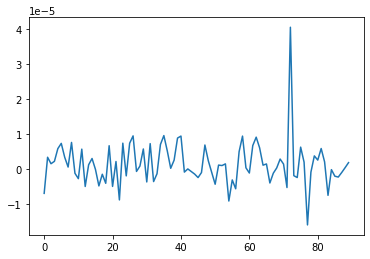

In [8]:
plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'vo'].reset_index(drop=True))

In [10]:
gpi_bidim = gpi_bidim.loc[gpi_bidim.time=='1980-01-01'].dropna()
gpi_bidim.to_csv('gpi_bidim1.csv',index=False)

In [9]:
gpi_bidim = pd.read_csv('gpi_bidim1.csv')
crs = {'init' : 'EPSG:4326'}

geometry_mi = [Point(xy) for xy in zip(gpi_bidim['longitude'], gpi_bidim['latitude'])]
geometry_mi[:3]

features_gdf = gpd.GeoDataFrame(gpi_bidim,geometry=geometry_mi) # ,crs=crs

fig,ax = plt.subplots(2,1,figsize=(15,15))

shapeWorld.plot(ax=ax[0],alpha=1,color='grey') 
features_gdf.plot(ax=ax[0],markersize=20,marker='o',label='vo',column='vo',legend=True,alpha=0.7)


FileNotFoundError: [Errno 2] No such file or directory: 'gpi_bidim1.csv'

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      u
time                                                 
1980-01-01     10512      10512          10512  10512
1980-01-02     10512      10512          10512  10512
1980-01-03     10512      10512          10512  10512
1980-01-04     10512      10512          10512  10512
1980-01-05     10512      10512          10512  10512
1980-01-06     10512      10512          10512  10512
1980-01-07     10512      10512          10512  10512
1980-01-08     10512      10512          10512  10512
1980-01-09     10512      10512          10512  10512
1980-01-10     10512      10512          10512  10512
1980-01-11     10512      10512          10512  10512
1980-01-12     10512      10512          10512  10512
1980-01-13     10512      10512          10512  10512
1980-01-14     10512      10512          10512  10512
1980-01-15     10512      10512          10512  10512
1980-01-16     10512      10512          10512  10512
1980-01-17     10512      10

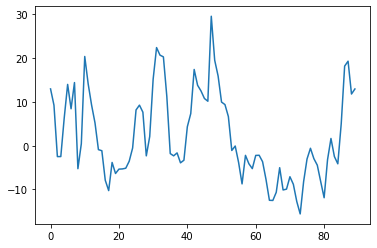

In [24]:
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==200.0,['time','latitude','longitude','isobaricInhPa','u']]
print(gpi_bidim.groupby(['time']).count())
plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'u'].reset_index(drop=True))

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      u
time                                                 
1980-01-01     10512      10512          10512  10512
1980-01-02     10512      10512          10512  10512
1980-01-03     10512      10512          10512  10512
1980-01-04     10512      10512          10512  10512
1980-01-05     10512      10512          10512  10512
1980-01-06     10512      10512          10512  10512
1980-01-07     10512      10512          10512  10512
1980-01-08     10512      10512          10512  10512
1980-01-09     10512      10512          10512  10512
1980-01-10     10512      10512          10512  10512
1980-01-11     10512      10512          10512  10512
1980-01-12     10512      10512          10512  10512
1980-01-13     10512      10512          10512  10512
1980-01-14     10512      10512          10512  10512
1980-01-15     10512      10512          10512  10512
1980-01-16     10512      10512          10512  10512
1980-01-17     10512      10

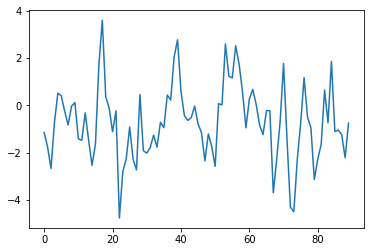

In [25]:
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==850.0,['time','latitude','longitude','isobaricInhPa','u']]
print(gpi_bidim.groupby(['time']).count())
plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'u'].reset_index(drop=True))

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      v
time                                                 
1980-01-01     10512      10512          10512  10512
1980-01-02     10512      10512          10512  10512
1980-01-03     10512      10512          10512  10512
1980-01-04     10512      10512          10512  10512
1980-01-05     10512      10512          10512  10512
1980-01-06     10512      10512          10512  10512
1980-01-07     10512      10512          10512  10512
1980-01-08     10512      10512          10512  10512
1980-01-09     10512      10512          10512  10512
1980-01-10     10512      10512          10512  10512
1980-01-11     10512      10512          10512  10512
1980-01-12     10512      10512          10512  10512
1980-01-13     10512      10512          10512  10512
1980-01-14     10512      10512          10512  10512
1980-01-15     10512      10512          10512  10512
1980-01-16     10512      10512          10512  10512
1980-01-17     10512      10

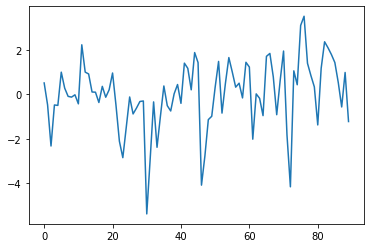

In [26]:
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==850.0,['time','latitude','longitude','isobaricInhPa','v']]
print(gpi_bidim.groupby(['time']).count())
plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'v'].reset_index(drop=True))

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      v
time                                                 
1980-01-01     10512      10512          10512  10512
1980-01-02     10512      10512          10512  10512
1980-01-03     10512      10512          10512  10512
1980-01-04     10512      10512          10512  10512
1980-01-05     10512      10512          10512  10512
1980-01-06     10512      10512          10512  10512
1980-01-07     10512      10512          10512  10512
1980-01-08     10512      10512          10512  10512
1980-01-09     10512      10512          10512  10512
1980-01-10     10512      10512          10512  10512
1980-01-11     10512      10512          10512  10512
1980-01-12     10512      10512          10512  10512
1980-01-13     10512      10512          10512  10512
1980-01-14     10512      10512          10512  10512
1980-01-15     10512      10512          10512  10512
1980-01-16     10512      10512          10512  10512
1980-01-17     10512      10

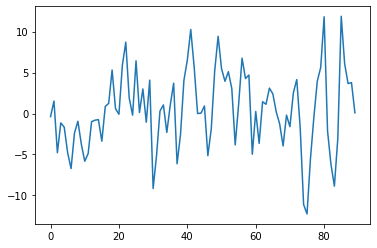

In [27]:
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==200.0,['time','latitude','longitude','isobaricInhPa','v']]
print(gpi_bidim.groupby(['time']).count())
plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'v'].reset_index(drop=True))

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      r
time                                                 
1980-01-01     10512      10512          10512  10512
1980-01-02     10512      10512          10512  10512
1980-01-03     10512      10512          10512  10512
1980-01-04     10512      10512          10512  10512
1980-01-05     10512      10512          10512  10512
1980-01-06     10512      10512          10512  10512
1980-01-07     10512      10512          10512  10512
1980-01-08     10512      10512          10512  10512
1980-01-09     10512      10512          10512  10512
1980-01-10     10512      10512          10512  10512
1980-01-11     10512      10512          10512  10512
1980-01-12     10512      10512          10512  10512
1980-01-13     10512      10512          10512  10512
1980-01-14     10512      10512          10512  10512
1980-01-15     10512      10512          10512  10512
1980-01-16     10512      10512          10512  10512
1980-01-17     10512      10

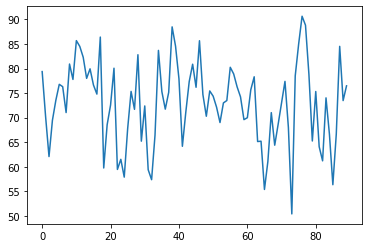

In [29]:
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'r'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','isobaricInhPa','r']]
print(gpi_bidim.groupby(['time']).count())
plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'r'].reset_index(drop=True))

In [20]:
### check altri file
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800331_19800628.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'vo'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','isobaricInhPa','vo']]
print(gpi_bidim.loc[gpi_bidim.isobaricInhPa!=850.0])
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800331_19800628.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==200.0,['time','latitude','longitude','isobaricInhPa','u']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800331_19800628.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==850.0,['time','latitude','longitude','isobaricInhPa','u']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800331_19800628.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==200.0,['time','latitude','longitude','isobaricInhPa','v']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800331_19800628.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==850.0,['time','latitude','longitude','isobaricInhPa','v']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800331_19800628.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'r'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','isobaricInhPa','r']]
print(gpi_bidim.groupby(['time']).count())

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800331_19800628.grb.02ccc.idx' incompatible with GRIB file
Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800331_19800628.grb.02ccc.idx' incompatible with GRIB file


Empty DataFrame
Columns: [time, latitude, longitude, isobaricInhPa, vo]
Index: []
            latitude  longitude  isobaricInhPa     vo
time                                                 
1980-03-31     10512      10512          10512  10512
1980-04-01     10512      10512          10512  10512
1980-04-02     10512      10512          10512  10512
1980-04-03     10512      10512          10512  10512
1980-04-04     10512      10512          10512  10512
1980-04-05     10512      10512          10512  10512
1980-04-06     10512      10512          10512  10512
1980-04-07     10512      10512          10512  10512
1980-04-08     10512      10512          10512  10512
1980-04-09     10512      10512          10512  10512
1980-04-10     10512      10512          10512  10512
1980-04-11     10512      10512          10512  10512
1980-04-12     10512      10512          10512  10512
1980-04-13     10512      10512          10512  10512
1980-04-14     10512      10512          10512  10512


Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800331_19800628.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      u
time                                                 
1980-03-31     10512      10512          10512  10512
1980-04-01     10512      10512          10512  10512
1980-04-02     10512      10512          10512  10512
1980-04-03     10512      10512          10512  10512
1980-04-04     10512      10512          10512  10512
1980-04-05     10512      10512          10512  10512
1980-04-06     10512      10512          10512  10512
1980-04-07     10512      10512          10512  10512
1980-04-08     10512      10512          10512  10512
1980-04-09     10512      10512          10512  10512
1980-04-10     10512      10512          10512  10512
1980-04-11     10512      10512          10512  10512
1980-04-12     10512      10512          10512  10512
1980-04-13     10512      10512          10512  10512
1980-04-14     10512      10512          10512  10512
1980-04-15     10512      10512          10512  10512
1980-04-16     10512      10

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800331_19800628.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      u
time                                                 
1980-03-31     10512      10512          10512  10512
1980-04-01     10512      10512          10512  10512
1980-04-02     10512      10512          10512  10512
1980-04-03     10512      10512          10512  10512
1980-04-04     10512      10512          10512  10512
1980-04-05     10512      10512          10512  10512
1980-04-06     10512      10512          10512  10512
1980-04-07     10512      10512          10512  10512
1980-04-08     10512      10512          10512  10512
1980-04-09     10512      10512          10512  10512
1980-04-10     10512      10512          10512  10512
1980-04-11     10512      10512          10512  10512
1980-04-12     10512      10512          10512  10512
1980-04-13     10512      10512          10512  10512
1980-04-14     10512      10512          10512  10512
1980-04-15     10512      10512          10512  10512
1980-04-16     10512      10

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800331_19800628.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      v
time                                                 
1980-03-31     10512      10512          10512  10512
1980-04-01     10512      10512          10512  10512
1980-04-02     10512      10512          10512  10512
1980-04-03     10512      10512          10512  10512
1980-04-04     10512      10512          10512  10512
1980-04-05     10512      10512          10512  10512
1980-04-06     10512      10512          10512  10512
1980-04-07     10512      10512          10512  10512
1980-04-08     10512      10512          10512  10512
1980-04-09     10512      10512          10512  10512
1980-04-10     10512      10512          10512  10512
1980-04-11     10512      10512          10512  10512
1980-04-12     10512      10512          10512  10512
1980-04-13     10512      10512          10512  10512
1980-04-14     10512      10512          10512  10512
1980-04-15     10512      10512          10512  10512
1980-04-16     10512      10

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800331_19800628.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      v
time                                                 
1980-03-31     10512      10512          10512  10512
1980-04-01     10512      10512          10512  10512
1980-04-02     10512      10512          10512  10512
1980-04-03     10512      10512          10512  10512
1980-04-04     10512      10512          10512  10512
1980-04-05     10512      10512          10512  10512
1980-04-06     10512      10512          10512  10512
1980-04-07     10512      10512          10512  10512
1980-04-08     10512      10512          10512  10512
1980-04-09     10512      10512          10512  10512
1980-04-10     10512      10512          10512  10512
1980-04-11     10512      10512          10512  10512
1980-04-12     10512      10512          10512  10512
1980-04-13     10512      10512          10512  10512
1980-04-14     10512      10512          10512  10512
1980-04-15     10512      10512          10512  10512
1980-04-16     10512      10

In [21]:
### check altri file
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800629_19800926.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'vo'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','isobaricInhPa','vo']]
print(gpi_bidim.loc[gpi_bidim.isobaricInhPa!=850.0])
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800629_19800926.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==200.0,['time','latitude','longitude','isobaricInhPa','u']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800629_19800926.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==850.0,['time','latitude','longitude','isobaricInhPa','u']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800629_19800926.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==200.0,['time','latitude','longitude','isobaricInhPa','v']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800629_19800926.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==850.0,['time','latitude','longitude','isobaricInhPa','v']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800629_19800926.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'r'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','isobaricInhPa','r']]
print(gpi_bidim.groupby(['time']).count())

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800629_19800926.grb.02ccc.idx' incompatible with GRIB file


Empty DataFrame
Columns: [time, latitude, longitude, isobaricInhPa, vo]
Index: []
            latitude  longitude  isobaricInhPa     vo
time                                                 
1980-06-29     10512      10512          10512  10512
1980-06-30     10512      10512          10512  10512
1980-07-01     10512      10512          10512  10512
1980-07-02     10512      10512          10512  10512
1980-07-03     10512      10512          10512  10512
1980-07-04     10512      10512          10512  10512
1980-07-05     10512      10512          10512  10512
1980-07-06     10512      10512          10512  10512
1980-07-07     10512      10512          10512  10512
1980-07-08     10512      10512          10512  10512
1980-07-09     10512      10512          10512  10512
1980-07-10     10512      10512          10512  10512
1980-07-11     10512      10512          10512  10512
1980-07-12     10512      10512          10512  10512
1980-07-13     10512      10512          10512  10512


Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800629_19800926.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      u
time                                                 
1980-06-29     10512      10512          10512  10512
1980-06-30     10512      10512          10512  10512
1980-07-01     10512      10512          10512  10512
1980-07-02     10512      10512          10512  10512
1980-07-03     10512      10512          10512  10512
1980-07-04     10512      10512          10512  10512
1980-07-05     10512      10512          10512  10512
1980-07-06     10512      10512          10512  10512
1980-07-07     10512      10512          10512  10512
1980-07-08     10512      10512          10512  10512
1980-07-09     10512      10512          10512  10512
1980-07-10     10512      10512          10512  10512
1980-07-11     10512      10512          10512  10512
1980-07-12     10512      10512          10512  10512
1980-07-13     10512      10512          10512  10512
1980-07-14     10512      10512          10512  10512
1980-07-15     10512      10

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800629_19800926.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      u
time                                                 
1980-06-29     10512      10512          10512  10512
1980-06-30     10512      10512          10512  10512
1980-07-01     10512      10512          10512  10512
1980-07-02     10512      10512          10512  10512
1980-07-03     10512      10512          10512  10512
1980-07-04     10512      10512          10512  10512
1980-07-05     10512      10512          10512  10512
1980-07-06     10512      10512          10512  10512
1980-07-07     10512      10512          10512  10512
1980-07-08     10512      10512          10512  10512
1980-07-09     10512      10512          10512  10512
1980-07-10     10512      10512          10512  10512
1980-07-11     10512      10512          10512  10512
1980-07-12     10512      10512          10512  10512
1980-07-13     10512      10512          10512  10512
1980-07-14     10512      10512          10512  10512
1980-07-15     10512      10

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800629_19800926.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      v
time                                                 
1980-06-29     10512      10512          10512  10512
1980-06-30     10512      10512          10512  10512
1980-07-01     10512      10512          10512  10512
1980-07-02     10512      10512          10512  10512
1980-07-03     10512      10512          10512  10512
1980-07-04     10512      10512          10512  10512
1980-07-05     10512      10512          10512  10512
1980-07-06     10512      10512          10512  10512
1980-07-07     10512      10512          10512  10512
1980-07-08     10512      10512          10512  10512
1980-07-09     10512      10512          10512  10512
1980-07-10     10512      10512          10512  10512
1980-07-11     10512      10512          10512  10512
1980-07-12     10512      10512          10512  10512
1980-07-13     10512      10512          10512  10512
1980-07-14     10512      10512          10512  10512
1980-07-15     10512      10

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800629_19800926.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      v
time                                                 
1980-06-29     10512      10512          10512  10512
1980-06-30     10512      10512          10512  10512
1980-07-01     10512      10512          10512  10512
1980-07-02     10512      10512          10512  10512
1980-07-03     10512      10512          10512  10512
1980-07-04     10512      10512          10512  10512
1980-07-05     10512      10512          10512  10512
1980-07-06     10512      10512          10512  10512
1980-07-07     10512      10512          10512  10512
1980-07-08     10512      10512          10512  10512
1980-07-09     10512      10512          10512  10512
1980-07-10     10512      10512          10512  10512
1980-07-11     10512      10512          10512  10512
1980-07-12     10512      10512          10512  10512
1980-07-13     10512      10512          10512  10512
1980-07-14     10512      10512          10512  10512
1980-07-15     10512      10

In [22]:
### check altri file
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800927_19801225.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'vo'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','isobaricInhPa','vo']]
print(gpi_bidim.loc[gpi_bidim.isobaricInhPa!=850.0])
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800927_19801225.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==200.0,['time','latitude','longitude','isobaricInhPa','u']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800927_19801225.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==850.0,['time','latitude','longitude','isobaricInhPa','u']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800927_19801225.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==200.0,['time','latitude','longitude','isobaricInhPa','v']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800927_19801225.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==850.0,['time','latitude','longitude','isobaricInhPa','v']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800927_19801225.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'r'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','isobaricInhPa','r']]
print(gpi_bidim.groupby(['time']).count())

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800927_19801225.grb.02ccc.idx' incompatible with GRIB file


Empty DataFrame
Columns: [time, latitude, longitude, isobaricInhPa, vo]
Index: []
            latitude  longitude  isobaricInhPa     vo
time                                                 
1980-09-27     10512      10512          10512  10512
1980-09-28     10512      10512          10512  10512
1980-09-29     10512      10512          10512  10512
1980-09-30     10512      10512          10512  10512
1980-10-01     10512      10512          10512  10512
1980-10-02     10512      10512          10512  10512
1980-10-03     10512      10512          10512  10512
1980-10-04     10512      10512          10512  10512
1980-10-05     10512      10512          10512  10512
1980-10-06     10512      10512          10512  10512
1980-10-07     10512      10512          10512  10512
1980-10-08     10512      10512          10512  10512
1980-10-09     10512      10512          10512  10512
1980-10-10     10512      10512          10512  10512
1980-10-11     10512      10512          10512  10512


Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800927_19801225.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      u
time                                                 
1980-09-27     10512      10512          10512  10512
1980-09-28     10512      10512          10512  10512
1980-09-29     10512      10512          10512  10512
1980-09-30     10512      10512          10512  10512
1980-10-01     10512      10512          10512  10512
1980-10-02     10512      10512          10512  10512
1980-10-03     10512      10512          10512  10512
1980-10-04     10512      10512          10512  10512
1980-10-05     10512      10512          10512  10512
1980-10-06     10512      10512          10512  10512
1980-10-07     10512      10512          10512  10512
1980-10-08     10512      10512          10512  10512
1980-10-09     10512      10512          10512  10512
1980-10-10     10512      10512          10512  10512
1980-10-11     10512      10512          10512  10512
1980-10-12     10512      10512          10512  10512
1980-10-13     10512      10

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800927_19801225.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      u
time                                                 
1980-09-27     10512      10512          10512  10512
1980-09-28     10512      10512          10512  10512
1980-09-29     10512      10512          10512  10512
1980-09-30     10512      10512          10512  10512
1980-10-01     10512      10512          10512  10512
1980-10-02     10512      10512          10512  10512
1980-10-03     10512      10512          10512  10512
1980-10-04     10512      10512          10512  10512
1980-10-05     10512      10512          10512  10512
1980-10-06     10512      10512          10512  10512
1980-10-07     10512      10512          10512  10512
1980-10-08     10512      10512          10512  10512
1980-10-09     10512      10512          10512  10512
1980-10-10     10512      10512          10512  10512
1980-10-11     10512      10512          10512  10512
1980-10-12     10512      10512          10512  10512
1980-10-13     10512      10

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800927_19801225.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      v
time                                                 
1980-09-27     10512      10512          10512  10512
1980-09-28     10512      10512          10512  10512
1980-09-29     10512      10512          10512  10512
1980-09-30     10512      10512          10512  10512
1980-10-01     10512      10512          10512  10512
1980-10-02     10512      10512          10512  10512
1980-10-03     10512      10512          10512  10512
1980-10-04     10512      10512          10512  10512
1980-10-05     10512      10512          10512  10512
1980-10-06     10512      10512          10512  10512
1980-10-07     10512      10512          10512  10512
1980-10-08     10512      10512          10512  10512
1980-10-09     10512      10512          10512  10512
1980-10-10     10512      10512          10512  10512
1980-10-11     10512      10512          10512  10512
1980-10-12     10512      10512          10512  10512
1980-10-13     10512      10

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19800927_19801225.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      v
time                                                 
1980-09-27     10512      10512          10512  10512
1980-09-28     10512      10512          10512  10512
1980-09-29     10512      10512          10512  10512
1980-09-30     10512      10512          10512  10512
1980-10-01     10512      10512          10512  10512
1980-10-02     10512      10512          10512  10512
1980-10-03     10512      10512          10512  10512
1980-10-04     10512      10512          10512  10512
1980-10-05     10512      10512          10512  10512
1980-10-06     10512      10512          10512  10512
1980-10-07     10512      10512          10512  10512
1980-10-08     10512      10512          10512  10512
1980-10-09     10512      10512          10512  10512
1980-10-10     10512      10512          10512  10512
1980-10-11     10512      10512          10512  10512
1980-10-12     10512      10512          10512  10512
1980-10-13     10512      10

In [23]:
### check altri file
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19801226_19810101.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'vo'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','isobaricInhPa','vo']]
print(gpi_bidim.loc[gpi_bidim.isobaricInhPa!=850.0])
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19801226_19810101.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==200.0,['time','latitude','longitude','isobaricInhPa','u']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19801226_19810101.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==850.0,['time','latitude','longitude','isobaricInhPa','u']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19801226_19810101.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==200.0,['time','latitude','longitude','isobaricInhPa','v']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19801226_19810101.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==850.0,['time','latitude','longitude','isobaricInhPa','v']]
print(gpi_bidim.groupby(['time']).count())

ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19801226_19810101.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'r'}})
gpi_bidim = ds.to_dataframe()

gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','isobaricInhPa','r']]
print(gpi_bidim.groupby(['time']).count())

Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19801226_19810101.grb.02ccc.idx' incompatible with GRIB file
Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19801226_19810101.grb.02ccc.idx' incompatible with GRIB file
Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19801226_19810101.grb.02ccc.idx' incompatible with GRIB file


Empty DataFrame
Columns: [time, latitude, longitude, isobaricInhPa, vo]
Index: []
            latitude  longitude  isobaricInhPa     vo
time                                                 
1980-12-26     10512      10512          10512  10512
1980-12-27     10512      10512          10512  10512
1980-12-28     10512      10512          10512  10512
1980-12-29     10512      10512          10512  10512
1980-12-30     10512      10512          10512  10512
1980-12-31     10512      10512          10512  10512
1981-01-01     10512      10512          10512  10512
            latitude  longitude  isobaricInhPa      u
time                                                 
1980-12-26     10512      10512          10512  10512
1980-12-27     10512      10512          10512  10512
1980-12-28     10512      10512          10512  10512
1980-12-29     10512      10512          10512  10512
1980-12-30     10512      10512          10512  10512
1980-12-31     10512      10512          10512  10512


Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19801226_19810101.grb.02ccc.idx' incompatible with GRIB file
Ignoring index file '/Users/paolo/Documents/clint_datasets/2d_gpi_19801226_19810101.grb.02ccc.idx' incompatible with GRIB file


            latitude  longitude  isobaricInhPa      v
time                                                 
1980-12-26     10512      10512          10512  10512
1980-12-27     10512      10512          10512  10512
1980-12-28     10512      10512          10512  10512
1980-12-29     10512      10512          10512  10512
1980-12-30     10512      10512          10512  10512
1980-12-31     10512      10512          10512  10512
1981-01-01     10512      10512          10512  10512
            latitude  longitude  isobaricInhPa      v
time                                                 
1980-12-26     10512      10512          10512  10512
1980-12-27     10512      10512          10512  10512
1980-12-28     10512      10512          10512  10512
1980-12-29     10512      10512          10512  10512
1980-12-30     10512      10512          10512  10512
1980-12-31     10512      10512          10512  10512
1981-01-01     10512      10512          10512  10512
            latitude  longit

# T1) TC_ACT

In [10]:
path='/Users/paolo/Documents/clint_datasets/tc_act.csv'
sst_trop_raw = pd.read_csv(path)
sst_trop_raw

,Unnamed: 0,S.Ind.WAll,S.Ind.WGen,S.Ind.EAll,S.Ind.EGen
0,1980-01-01,0.00,0.0,0.0,0.0
1,1980-01-02,0.00,0.0,0.0,0.0
2,1980-01-03,0.00,0.0,0.0,0.0
3,1980-01-04,0.00,0.0,0.0,0.0
4,1980-01-05,0.00,0.0,0.0,0.0
...,...,...,...,...,...
14631,2020-01-22,0.00,0.0,0.0,0.0
14632,2020-01-23,0.00,0.0,0.0,0.0
14633,2020-01-24,0.00,0.0,0.0,0.0
14634,2020-01-25,0.25,1.0,0.0,0.0


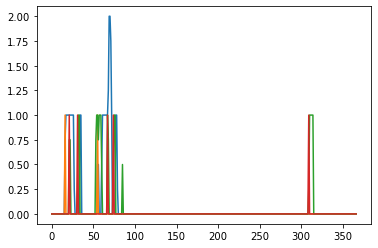

In [19]:
plt.plot(sst_trop_raw.loc[0:366,'S.Ind.WAll'])
plt.plot(sst_trop_raw.loc[0:366,'S.Ind.WGen'])
plt.plot(sst_trop_raw.loc[0:366,'S.Ind.EAll'])
plt.plot(sst_trop_raw.loc[0:366,'S.Ind.EGen'])

# T2) actmask_hist_300km_17ms

4 dati al giorno per ciascuna cella

In [5]:
ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/actmask_hist_300km_17ms_198001.grb")
actmask = ds.to_dataframe()
actmask

RuntimeError: Cannot find the ecCodes library

In [6]:
print(actmask.step.unique())
print(actmask.number.unique())
print(actmask.surface.unique())

[0]
[0]
[0.]


In [9]:
actmask = actmask.reset_index()
actmask = actmask.loc[:,['time','latitude','longitude','lsm']]
actmask.groupby(['time']).count()

,latitude,longitude,lsm
time,,,
1980-01-01 00:00:00,1038240,1038240,1038240
1980-01-01 00:06:00,1038240,1038240,1038240
1980-01-01 00:12:00,1038240,1038240,1038240
1980-01-01 00:18:00,1038240,1038240,1038240
1980-01-02 00:00:00,1038240,1038240,1038240
1980-01-02 00:06:00,1038240,1038240,1038240
1980-01-02 00:12:00,1038240,1038240,1038240
1980-01-02 00:18:00,1038240,1038240,1038240
1980-01-03 00:00:00,1038240,1038240,1038240


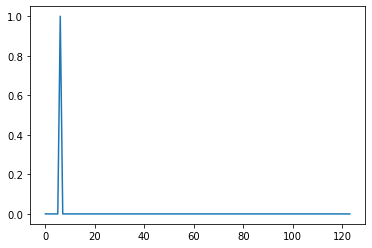

In [15]:
plt.plot(actmask.loc[(actmask.latitude==12) & (actmask.longitude==353.5),'lsm'].reset_index(drop=True))

In [16]:
actmask = actmask.loc[actmask.time=='1980-01-01 00:00:00'].dropna()
actmask.to_csv('actmask1.csv',index=False)